In [8]:
from collections import defaultdict

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
BLEU_SCORES_PATH = 'scoring/bleu-scores'
SIMPLE_BLEU_SCORES_PATH = 'scoring/simple-bleu-scores'
INTERPOLATE_SCORES_PATH = 'scoring/interpolate-bleu-scores'

In [10]:
bleu_scores = defaultdict(dict)
simple_bleu_scores = {}
interpolate_bleu_scores = defaultdict(dict)
with open(BLEU_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        model_one = line[0]
        model_two = line[1]
        try:
            score = float(line[2])
            bleu_scores[model_one][model_two] = score
            bleu_scores[model_two][model_one] = score
        except Exception as e:
            print(line, e)

with open(SIMPLE_BLEU_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        model = line[0]
        try:
            score = float(line[1])
            simple_bleu_scores[model] = score
        except Exception as e:
            print(line, e)

with open(INTERPOLATE_SCORES_PATH) as infile:
    for line in infile:
        line = line.strip().split('\t')
        model_one = line[0]
        model_two = line[1]
        try:
            score = float(line[2])
            bleu_scores[model_one][model_two] = score
            bleu_scores[model_two][model_one] = score
        except Exception as e:
            print(line, e)

['baseline_en-de_8k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_16k_ep25', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_16k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_32k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_64k_ep25', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['baseline_en-de_64k_ep25', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['m2m100_418M', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['m2m100_1.2B', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['m2m100_1.2B', 'Llama-3.1-8B-Instruct-3-SHOT', '-'] could not convert string to float: '-'
['nllb-200-distilled-600M', 'Llama-3.2-3B-Instruct-3-SHOT', '-'] could not convert string to float: '

In [11]:
delta_improvement = defaultdict(dict)
for model_one in bleu_scores:
    for model_two in bleu_scores[model_one]:
        delta_improvement[model_one][model_two] = bleu_scores[model_one][model_two] - max(simple_bleu_scores.get(model_one, 0), simple_bleu_scores.get(model_two, 0))

In [12]:
cmap = sns.diverging_palette(300, 145, s=100, as_cmap=True)

['baseline_en-de_8k_ep1', 'baseline_en-de_8k_ep2', 'baseline_en-de_8k_ep3', 'baseline_en-de_8k_ep4', 'baseline_en-de_8k_ep5', 'baseline_en-de_8k_ep10', 'baseline_en-de_8k_ep15', 'baseline_en-de_8k_ep20', 'baseline_en-de_8k_ep25', 'baseline_en-de_16k_ep1', 'baseline_en-de_16k_ep2', 'baseline_en-de_16k_ep3', 'baseline_en-de_16k_ep4', 'baseline_en-de_16k_ep5', 'baseline_en-de_16k_ep10', 'baseline_en-de_16k_ep15', 'baseline_en-de_16k_ep20', 'baseline_en-de_16k_ep25', 'baseline_en-de_32k_ep1', 'baseline_en-de_32k_ep2', 'baseline_en-de_32k_ep3', 'baseline_en-de_32k_ep4', 'baseline_en-de_32k_ep5', 'baseline_en-de_32k_ep10', 'baseline_en-de_32k_ep15', 'baseline_en-de_32k_ep20', 'baseline_en-de_32k_ep25', 'baseline_en-de_64k_ep1', 'baseline_en-de_64k_ep2', 'baseline_en-de_64k_ep3', 'baseline_en-de_64k_ep4', 'baseline_en-de_64k_ep5', 'baseline_en-de_64k_ep10', 'baseline_en-de_64k_ep15', 'baseline_en-de_64k_ep20', 'baseline_en-de_64k_ep25']


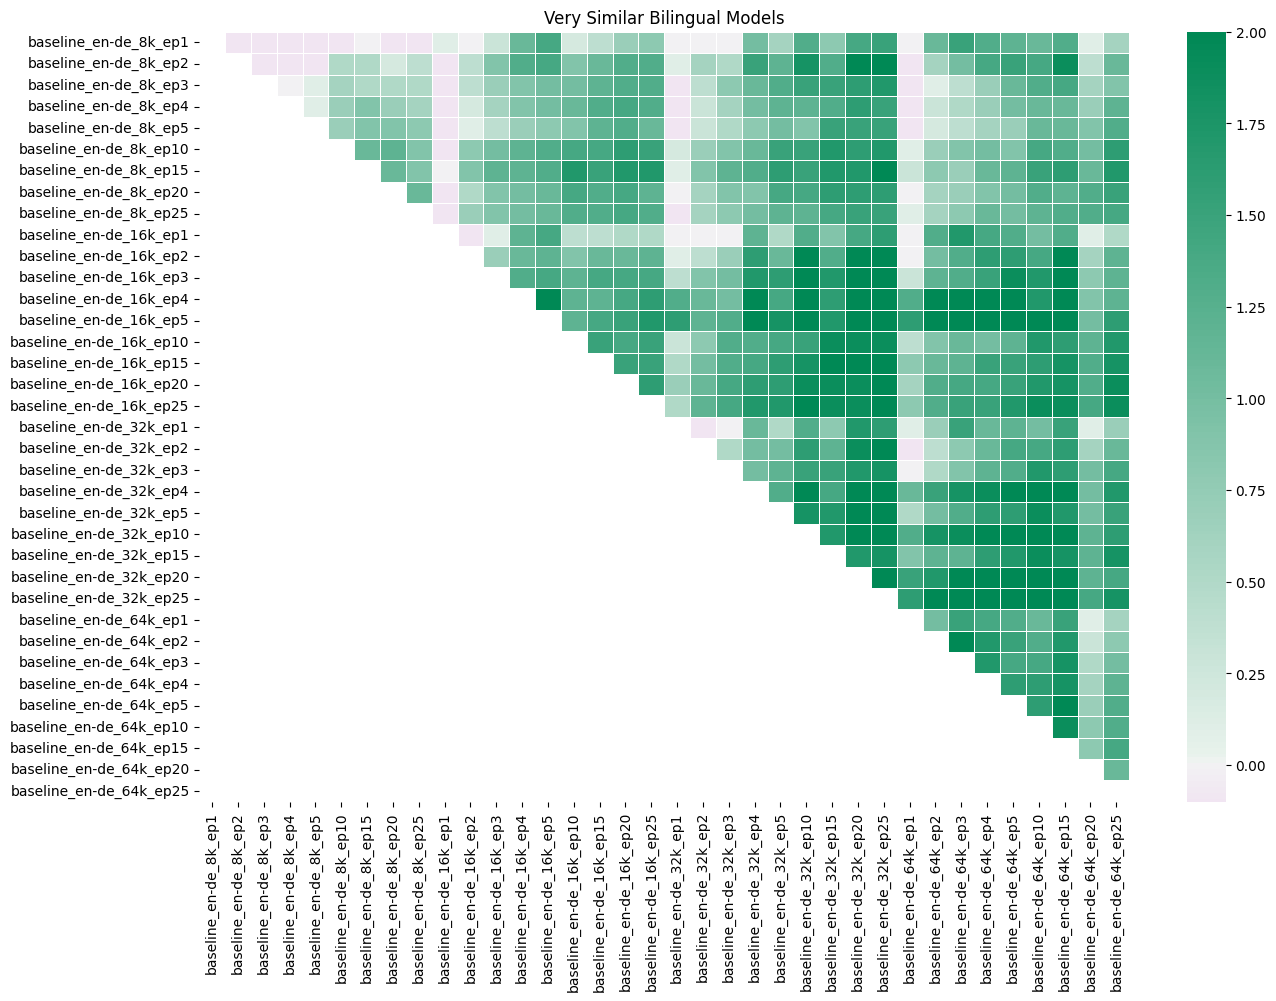

In [13]:
# Convert to DataFrame
# models = sorted(bleu_scores.keys())  # Ensure consistent order
models = [_ for _ in delta_improvement.keys() if _.startswith("baseline")]
print(models)
score_matrix = pd.DataFrame(delta_improvement, index=models, columns=models)

# Create a mask for the lower triangle
mask = np.tril(np.ones_like(score_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(
    score_matrix, 
    annot=False, 
    fmt=".2f", 
    mask=mask, 
    cmap=sns.diverging_palette(300, 145, s=100, as_cmap=True),  # Red for negative, Yellow for zero, Green for positive
    linewidths=0.5, 
    center=0.0,  # Ensure zero is yellow, balancing red/green around zero
    vmin=-0.1,
    vmax=2
)

plt.title("Very Similar Bilingual Models")
plt.show()

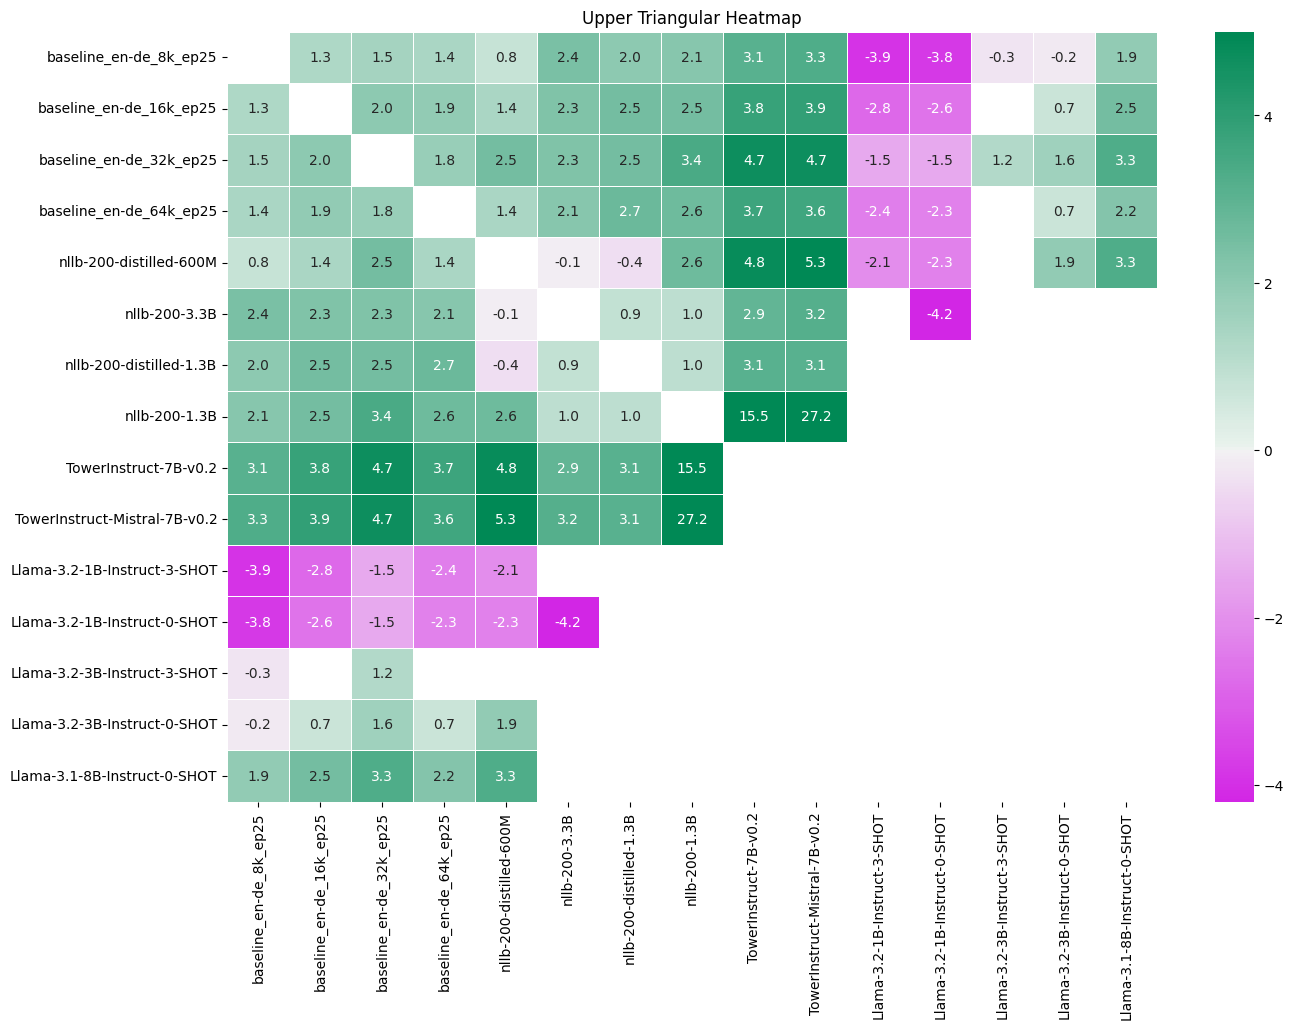

In [16]:
# Convert to DataFrame
# models = sorted(bleu_scores.keys())  # Ensure consistent order
models = [_ for _ in delta_improvement.keys() if _.endswith("ep25") or not _.startswith("baseline") and not "m2m" in _]
score_matrix = pd.DataFrame(delta_improvement, index=models, columns=models)

# Create a mask for the lower triangle
# mask = np.tril(np.ones_like(score_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(15, 10))

sns.heatmap(
    score_matrix, 
    annot=True, 
    fmt=".1f", 
    # mask=mask, 
    cmap=cmap,  # Red for negative, Yellow for zero, Green for positive
    linewidths=0.5, 
    center=0,  # Ensure zero is yellow, balancing red/green around zero
    vmax=5
)

plt.title("Upper Triangular Heatmap")
plt.show()